## **Data Understanding**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, regularizers, optimizers
from tensorflow.keras.optimizers import Adam

**Load** **Dataset**

In [ ]:
!git clone https://github.com/allatifatulmuharomiah/Restaurant-Recommender-System.git

fatal: destination path 'Restaurant-Recommender-System' already exists and is not an empty directory.


In [ ]:
resto = pd.read_csv('/content/Restaurant-Recommender-System/gofood_dataset1.csv')
user = pd.read_csv('/content/Restaurant-Recommender-System/rating_user.csv')

**Dataset Resto**

In [ ]:
resto

,placeID,merchant_name,merchant_area,category,product,price,description
0,A001,"330 Kopi, Ciledug",jakarta,Jajanan/Minuman,Hot Almara Kopi (kopi Susu Gula Aren),20000,Sajian Kopi Susu Gula Aren Yang Berbeda Dari K...
1,A002,"Abe Steak, Cibubur",jakarta,Barat,Hemat Berdua,70000,2 Chicken Steak + 2 Es Jeruk
2,A003,"Abuba Steak, Cikarang",jakarta,Barat,Tas ABUBA ( Max 5 Box ),13200,NaN
3,A004,Aneka Gorengan Siaga,jakarta,Jajanan/Minuman,bakwan Sayur,1500,gorengan Bakwan +cabe Rawit
4,A005,Arangsimpur,jakarta,Bakmi/bakso/soto,Tiam MIE,34000,Mie Manis
...,...,...,...,...,...,...,...
682,A683,"XIBOBA, Tenggilis Surabaya",surabaya,Jajanan/Minuman,Crunchy Signature Kakao,21000,Cadburry chocolate milk dipadukan dengan choco...
683,A684,"XIBOBA, Tunjungan Plaza",surabaya,Jajanan/Minuman,Crunchy Signature Kakao,21000,Cadburry chocolate milk dipadukan dengan choco...
684,A685,"Yasaka Fried Chicken, Sukolegok",surabaya,Jajanan/Minuman,Promo Opening Cuman 10 Ribu Dapat 1 Ayam Crisp...,10000,Promo 1 Ayam Crispy Free Nasi Cuman 10 Ribu
685,A686,"Yakini, Krian",surabaya,Bakmi/bakso/soto,ICE GREEN TEA,11000,Perpaduan Tea Autentic Dan Susu (Gelas Jumbo)


In [ ]:
print('jumlah resto: ', len(resto.placeID.unique()))
print('Jumlah Kategori makanan: ', len(resto.category.unique()))
print('list Kategori makanan: ', resto.category.unique())

jumlah resto:  687
Jumlah Kategori makanan:  7
list Kategori makanan:  ['Jajanan/Minuman' 'Barat' 'Bakmi/bakso/soto'
 'Ayam & bebek/Seafood/daging' 'Aneka nasi' 'Roti' "Barat'"]


**Dataset User**

In [ ]:
user

,index,userID,placeID,rating
0,0,U1001,A037,3
1,1,U1001,A145,1
2,2,U1001,A126,3
3,3,U1001,A174,5
4,4,U1001,A042,5
...,...,...,...,...
1149,1149,U1137,A526,3
1150,1150,U1137,A675,2
1151,1151,U1138,A458,1
1152,1152,U1138,A605,2


In [ ]:
print('jumlah user: ', len(user.userID.unique()))
print('Jumlah data rating: ', len(user.rating))

jumlah user:  138
Jumlah data rating:  1154


## **Data Preprocessing**

In [ ]:
data = pd.merge(user, resto , on='placeID', how='left')
data

,index,userID,placeID,rating,merchant_name,merchant_area,category,product,price,description
0,0,U1001,A037,3,"Dapur Cokelat, Depok",jakarta,Jajanan/Minuman,Opera,100000,Ukuran 10 x 10cm
1,1,U1001,A145,1,MIXUE CIKARANG,jakarta,Jajanan/Minuman,Supreme Milk Tea,24000,Milk Tea With Pearl + Coconut Jelly + Oats + B...
2,2,U1001,A126,3,"Martabak Djuara, Cawang",jakarta,Jajanan/Minuman,Martabak Polos,55000,NaN
3,3,U1001,A174,5,Sei dalam Bambu,jakarta,Jajanan/Minuman,Paket Samurai Sei Sapi,72500,"2 Nasi Putih/Jeruk Dengan Telor Orak Arik, 2 S..."
4,4,U1001,A042,5,"Emados Shawarma, Depok",jakarta,Ayam & bebek/Seafood/daging,Roasted Chicken Veggies,139000,"Ayam Roasted Combinasi dengan jagung,Buuncis,K..."
...,...,...,...,...,...,...,...,...,...,...
1149,1149,U1137,A526,3,"Holywings, Kertajaya",surabaya,Aneka nasi,Chicken Wings Party Pack,270600,Special untuk kamu dan teman2 kamu yang mau me...
1150,1150,U1137,A675,2,WARUNG MBAKNET,surabaya,Jajanan/Minuman,BASO ACI LEMAK FROZEN,10000,Pentol Aci berisi Lemak
1151,1151,U1138,A458,1,"Break Cafe, Sedati",surabaya,Jajanan/Minuman,Buy 2 Get 2 Non Coffee,45999,"Matcha, Chocolate, Red Velvet, Taro"
1152,1152,U1138,A605,2,"Nyayap, Metropolis Tenggilis",surabaya,Ayam & bebek/Seafood/daging,Tebus Murah + 2022,100000,Buy 1 nyayap cheecorn + 1 nyayap black gangnam...


In [ ]:
data.groupby('placeID').sum()

<ipython-input-82-6aee29ddf7ce>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('placeID').sum()


,index,rating,price
placeID,,,
A001,98,1,20000
A002,282,5,70000
A003,714,5,26400
A004,685,6,3000
A005,506,7,68000
...,...,...,...
A679,1034,1,20000
A682,1725,10,42000
A684,2081,3,42000


In [ ]:
data.groupby('userID').sum()

<ipython-input-83-ea856c4ec446>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('userID').sum()


,index,rating,price
userID,,,
U1001,36,33,447500
U1002,135,33,424350
U1003,325,40,262800
U1004,284,22,391300
U1005,396,23,521300
...,...,...,...
U1134,17672,42,355080
U1135,15673,32,384050
U1136,11315,24,428500


## **Model Collaborative**

In [ ]:
df = data
df

,index,userID,placeID,rating,merchant_name,merchant_area,category,product,price,description
0,0,U1001,A037,3,"Dapur Cokelat, Depok",jakarta,Jajanan/Minuman,Opera,100000,Ukuran 10 x 10cm
1,1,U1001,A145,1,MIXUE CIKARANG,jakarta,Jajanan/Minuman,Supreme Milk Tea,24000,Milk Tea With Pearl + Coconut Jelly + Oats + B...
2,2,U1001,A126,3,"Martabak Djuara, Cawang",jakarta,Jajanan/Minuman,Martabak Polos,55000,NaN
3,3,U1001,A174,5,Sei dalam Bambu,jakarta,Jajanan/Minuman,Paket Samurai Sei Sapi,72500,"2 Nasi Putih/Jeruk Dengan Telor Orak Arik, 2 S..."
4,4,U1001,A042,5,"Emados Shawarma, Depok",jakarta,Ayam & bebek/Seafood/daging,Roasted Chicken Veggies,139000,"Ayam Roasted Combinasi dengan jagung,Buuncis,K..."
...,...,...,...,...,...,...,...,...,...,...
1149,1149,U1137,A526,3,"Holywings, Kertajaya",surabaya,Aneka nasi,Chicken Wings Party Pack,270600,Special untuk kamu dan teman2 kamu yang mau me...
1150,1150,U1137,A675,2,WARUNG MBAKNET,surabaya,Jajanan/Minuman,BASO ACI LEMAK FROZEN,10000,Pentol Aci berisi Lemak
1151,1151,U1138,A458,1,"Break Cafe, Sedati",surabaya,Jajanan/Minuman,Buy 2 Get 2 Non Coffee,45999,"Matcha, Chocolate, Red Velvet, Taro"
1152,1152,U1138,A605,2,"Nyayap, Metropolis Tenggilis",surabaya,Ayam & bebek/Seafood/daging,Tebus Murah + 2022,100000,Buy 1 nyayap cheecorn + 1 nyayap black gangnam...


In [ ]:
userID = df['userID'].unique().tolist()
user_encoded = {x: i for i, x in enumerate(userID)}
encoded_to_user = {i: x for i, x in enumerate(userID)}

In [ ]:
placeID = df['placeID'].unique().tolist()
resto_encoded = {x: i for i, x in enumerate(placeID)}
encoded_to_resto = {i: x for i, x in enumerate(placeID)}

In [ ]:
df['user'] = df['userID'].map(user_encoded)
df['resto'] = df['placeID'].map(resto_encoded)

In [ ]:
numUsers = len(user_encoded)
numResto = len(resto_encoded)
df['rating'] = df['rating'].values.astype(np.float32)

ratingMin = min(df['rating'])
ratingMax = max(df['rating'])

print(f"Jumlah Pengguna: {numUsers}, Jumlah Restoran: {numResto}, Rating Minimum: {ratingMin}, Rating Maksimum: {ratingMax}")


Jumlah Pengguna: 138, Jumlah Restoran: 553, Rating Minimum: 1.0, Rating Maksimum: 5.0


In [ ]:
df = df.sample(frac=1, random_state=42)

In [ ]:
features = df[['user', 'resto']].values
normalized_ratings = df['rating'].apply(lambda x: (x - ratingMin) / (ratingMax - ratingMin)).values

train_indices = int(0.8 * df.shape[0])

train_features, val_features = features[:train_indices], features[train_indices:]
train_ratings, val_ratings = normalized_ratings[:train_indices], normalized_ratings[train_indices:]


In [ ]:
class CollaborativeFilteringModel(tf.keras.Model):
    def __init__(self, numUsers, numResto, embedding_size, dropout_rate, **kwargs):
        super(CollaborativeFilteringModel, self).__init__(**kwargs)
        self.user_embedding = layers.Embedding(numUsers, embedding_size, embeddings_regularizer=regularizers.l2(0.01))
        self.resto_embedding = layers.Embedding(numResto, embedding_size, embeddings_regularizer=regularizers.l2(0.01))
        self.dropout = layers.Dropout(dropout_rate)
        self.batch_norm = layers.BatchNormalization()
        self.rating_prediction = layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        resto_vector = self.resto_embedding(inputs[:, 1])
        concatenated = layers.Concatenate()([user_vector, resto_vector])
        concatenated = self.dropout(concatenated)
        concatenated = self.batch_norm(concatenated)
        rating = self.rating_prediction(concatenated)
        return rating

In [ ]:
model = CollaborativeFilteringModel(numUsers, numResto, embedding_size=50, dropout_rate=0.5)
optimizer = optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=optimizer, loss='mse')

# Melatih model
history = model.fit(train_features, train_ratings, batch_size=64, epochs=250,
                    validation_data=(val_features, val_ratings))

Epoch 1/250
15/15 [==============================] - 2s 27ms/step - loss: 0.4514 - val_loss: 0.4075
Epoch 2/250
15/15 [==============================] - 0s 8ms/step - loss: 0.4527 - val_loss: 0.4061
Epoch 3/250
15/15 [==============================] - 0s 9ms/step - loss: 0.4530 - val_loss: 0.4049
Epoch 4/250
15/15 [==============================] - 0s 8ms/step - loss: 0.4498 - val_loss: 0.4038
Epoch 5/250
15/15 [==============================] - 0s 8ms/step - loss: 0.4482 - val_loss: 0.4027
Epoch 6/250
15/15 [==============================] - 0s 9ms/step - loss: 0.4499 - val_loss: 0.4016
Epoch 7/250
15/15 [==============================] - 0s 8ms/step - loss: 0.4429 - val_loss: 0.4006
Epoch 8/250
15/15 [==============================] - 0s 8ms/step - loss: 0.4502 - val_loss: 0.3995
Epoch 9/250
15/15 [==============================] - 0s 8ms/step - loss: 0.4412 - val_loss: 0.3985
Epoch 10/250
15/15 [==============================] - 0s 8ms/step - loss: 0.4352 - val_loss: 0.3975
Epoch 11

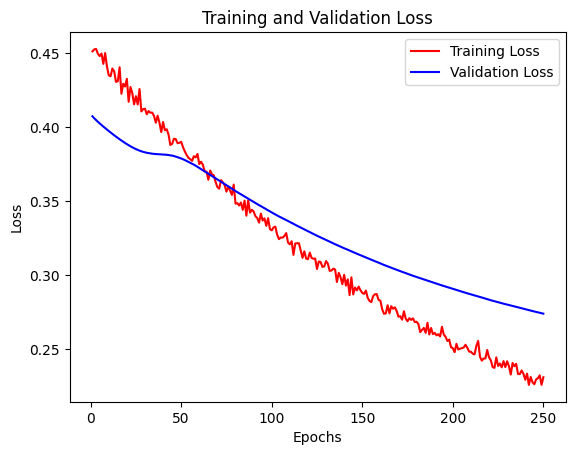

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Membuat plot loss terhadap epoch
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
resto_df = data
df = pd.read_csv('/content/Restaurant-Recommender-System/rating_user.csv')

new_user_id = 'U1003'
user_id = new_user_id
resto_visited_by_user = df[df.userID == user_id]

resto_not_visited = resto_df[~resto_df['placeID'].isin(resto_visited_by_user.placeID.values)]['placeID']
resto_not_visited = list(
    set(resto_not_visited)
    .intersection(set(resto_encoded.keys()))
)

resto_not_visited = [[resto_encoded.get(x)] for x in resto_not_visited]
user_encoder = user_encoded.get(user_id)
user_resto_array = np.hstack(
    ([[user_encoder]] * len(resto_not_visited), resto_not_visited)
)

In [ ]:
top_resto_user = (
    resto_visited_by_user.sort_values(
        by='rating',
        ascending=False
    )
    .head(5)
    .placeID.values
)

unique_top_resto_user = set(top_resto_user)
unique_visited_resto = resto_df[resto_df['placeID'].isin(unique_top_resto_user)]

unique_visited_resto = unique_visited_resto.drop_duplicates(subset=['placeID'])

print('Restoran yang pernah dikunjungi oleh pengguna :')
for row in unique_visited_resto.itertuples():
    print(row.merchant_name, ':', row.category)


Restoran yang pernah dikunjungi oleh pengguna :
Genkaya, Pabuaran : Jajanan/Minuman
Mokat, Megamendung : Jajanan/Minuman
MAISON BUTTER : Jajanan/Minuman
Bakmi Lopui 93 : Bakmi/bakso/soto
KFC, Ciputat Gaplek : Ayam & bebek/Seafood/daging


In [ ]:
ratings = model.predict(user_resto_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_resto_ids = [
    encoded_to_resto.get(resto_not_visited[x][0]) for x in top_ratings_indices
]

print('REKOMENDASI RESTORAN : {}'.format(user_id))

print('\nTop 10 rekomendasi restoran :')
unique_recommended_resto_ids = set(recommended_resto_ids)

unique_recommended_resto = resto_df[resto_df['placeID'].isin(unique_recommended_resto_ids)]

unique_recommended_resto = unique_recommended_resto.drop_duplicates(subset=['placeID'])

for row in unique_recommended_resto.itertuples():
    print(row.merchant_name, ':', row.category)


17/17 [==============================] - 0s 2ms/step
REKOMENDASI RESTORAN : U1003

Top 10 rekomendasi restoran :
MAB Toppoki, Jengki : Jajanan/Minuman
Corndog Doona, Pinang : Jajanan/Minuman
JACK DONUT : Jajanan/Minuman
DeFroggy : Jajanan/Minuman
Kopi Garasi Tua : Jajanan/Minuman
Seafood 2000, Krakatau : Aneka nasi
Yakini, Krian : Bakmi/bakso/soto
Mak Ciem, Pandaan : Jajanan/Minuman
Cafelar Coffee & Eatery : Jajanan/Minuman
Gildak, Tunjungan : Jajanan/Minuman


In [ ]:
model.save_weights('/content/Restaurant-Recommender-System/model_weights.h5')

In [ ]:
# Simpan model dalam format SavedModel
tf.saved_model.save(model, '/content/Restaurant-Recommender-System/saved_model')


In [ ]:
# Ubah model ke format TFLite
converter = tf.lite.TFLiteConverter.from_saved_model('/content/Restaurant-Recommender-System/saved_model')
tflite_model = converter.convert()

# Simpan model TFLite ke file
with open('/content/Restaurant-Recommender-System/model.tflite', 'wb') as f:
    f.write(tflite_model)